In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_spark_eventlog(df_jobs, df_stages):
    sns.set(style="whitegrid")

    # Plot 1: Stage Duration vs Stage ID
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='StageID', y='DurationSec', data=df_stages, color='blue')
    plt.title('Stage Duration vs Stage ID')
    plt.xlabel('Stage ID')
    plt.ylabel('Duration (seconds)')
    plt.axhline(df_stages['DurationSec'].mean(), color='red', linestyle='--', label='Mean Duration')
    plt.legend()
    plt.show()

    # Plot 2: Job Duration vs Job ID
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='JobID', y='DurationSec', data=df_jobs, color='green')
    plt.title('Job Duration vs Job ID')
    plt.xlabel('Job ID')
    plt.ylabel('Duration (seconds)')
    plt.axhline(df_jobs['DurationSec'].mean(), color='red', linestyle='--', label='Mean Duration')
    plt.legend()
    plt.show()

    # Plot 3: Stage Duration vs Number of Tasks
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='NumTasks', y='DurationSec', data=df_stages, color='purple')
    plt.title('Stage Duration vs Number of Tasks')
    plt.xlabel('Number of Tasks')
    plt.ylabel('Duration (seconds)')
    plt.axhline(df_stages['DurationSec'].mean(), color='red', linestyle='--', label='Mean Duration')
    plt.legend()
    plt.show()

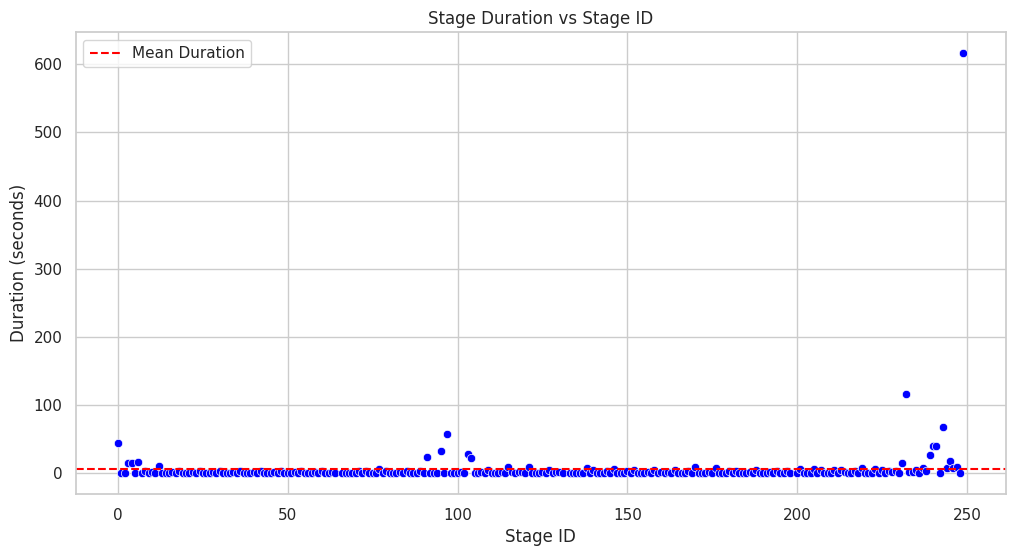

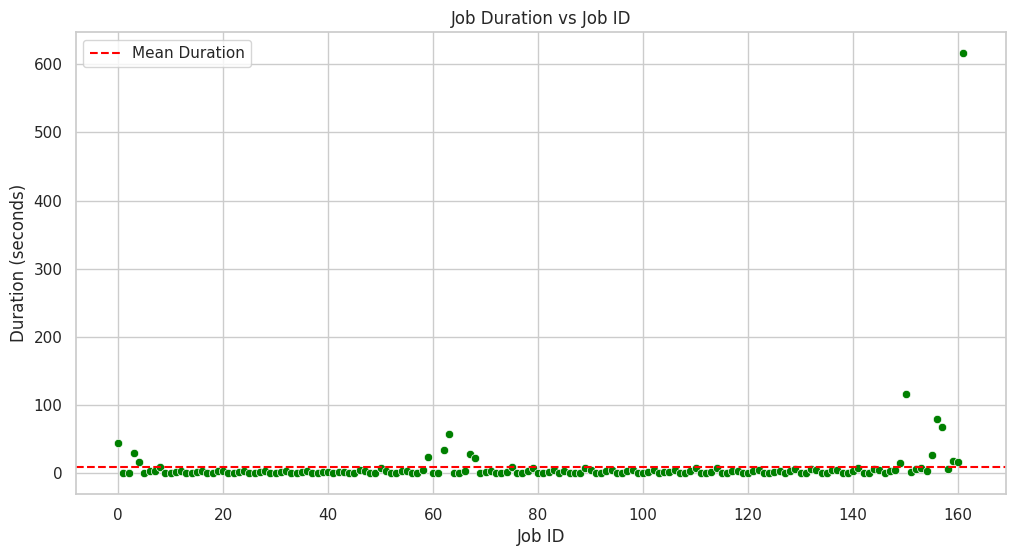

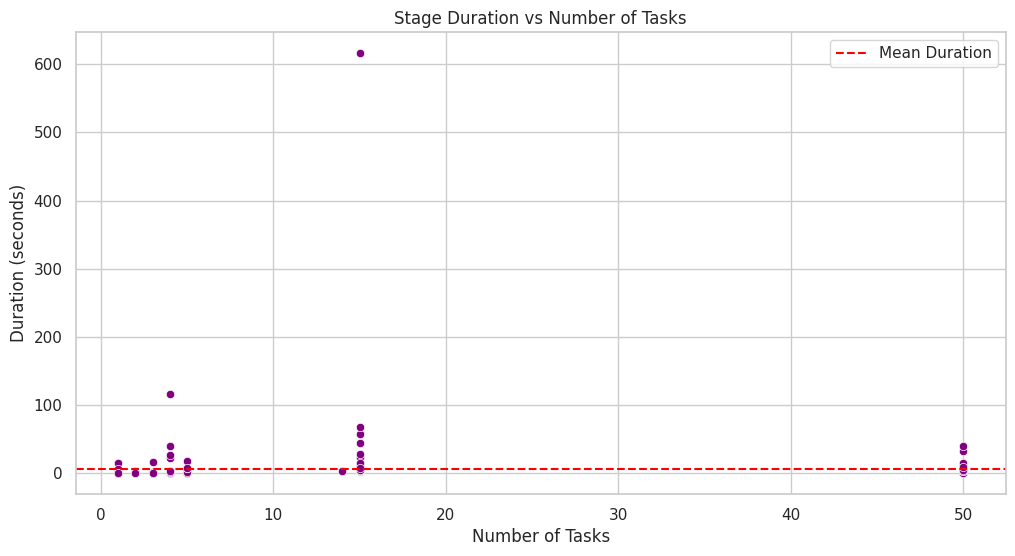

In [5]:
import pandas as pd

plot_spark_eventlog(pd.read_parquet("../../data/raw/first_experiment/df_jobs.parquet"), pd.read_parquet("../../data/raw/first_experiment/df_stages.parquet"))

In [7]:
def plot_bonus_spark_eventlog(df_jobs, df_stages):
    sns.set(style="whitegrid")

    # Heatmap of Job Durations over Time
    plt.figure(figsize=(14, 6))
    if 'SubmissionTime' in df_jobs.columns:
        df_jobs['SubmissionTime_dt'] = pd.to_datetime(df_jobs['SubmissionTime'], unit='ms')
        df_jobs_sorted = df_jobs.sort_values(by='SubmissionTime_dt')
        plt.plot(df_jobs_sorted['SubmissionTime_dt'], df_jobs_sorted['DurationSec'], marker='o', linestyle='-')
        plt.title('Job Duration Over Submission Time')
        plt.xlabel('Submission Time')
        plt.ylabel('Duration (seconds)')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

    # KDE Plot (Density) of Stage Durations
    plt.figure(figsize=(12, 6))
    sns.kdeplot(df_stages['DurationSec'], shade=True, color='purple')
    plt.title('Density Plot of Stage Durations')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

    # Bonus: Histogram of Stage Durations
    plt.figure(figsize=(12, 6))
    sns.histplot(df_stages['DurationSec'], bins=50, kde=False, color='orange')
    plt.title('Histogram of Stage Durations')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()



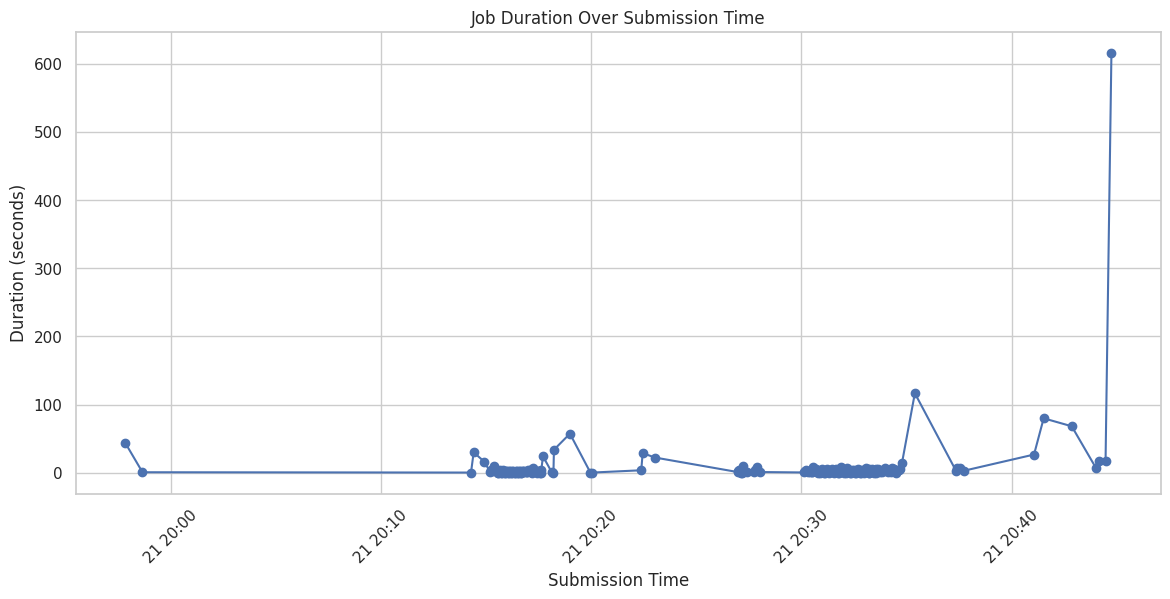

/tmp/ipykernel_13130/2522100623.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_stages['DurationSec'], shade=True, color='purple')


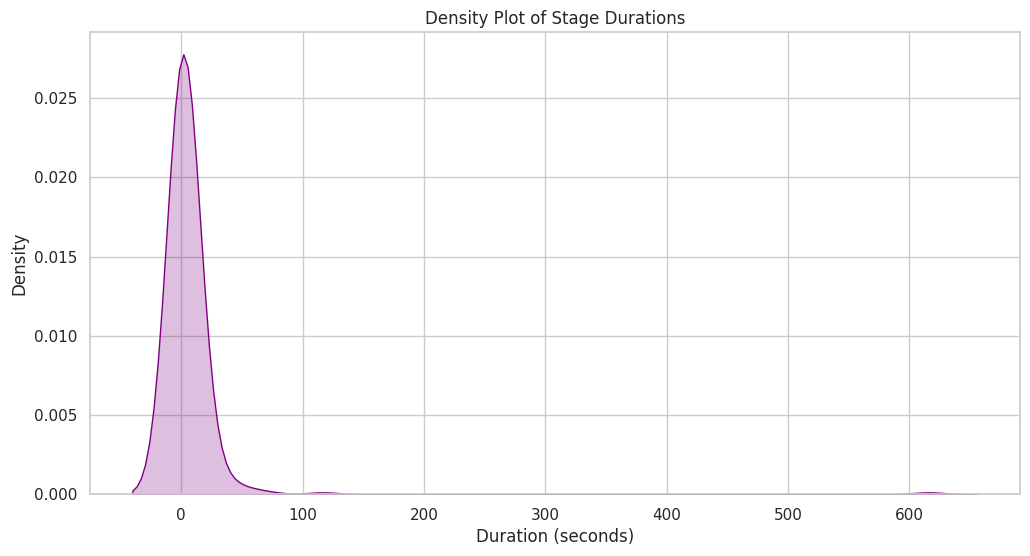

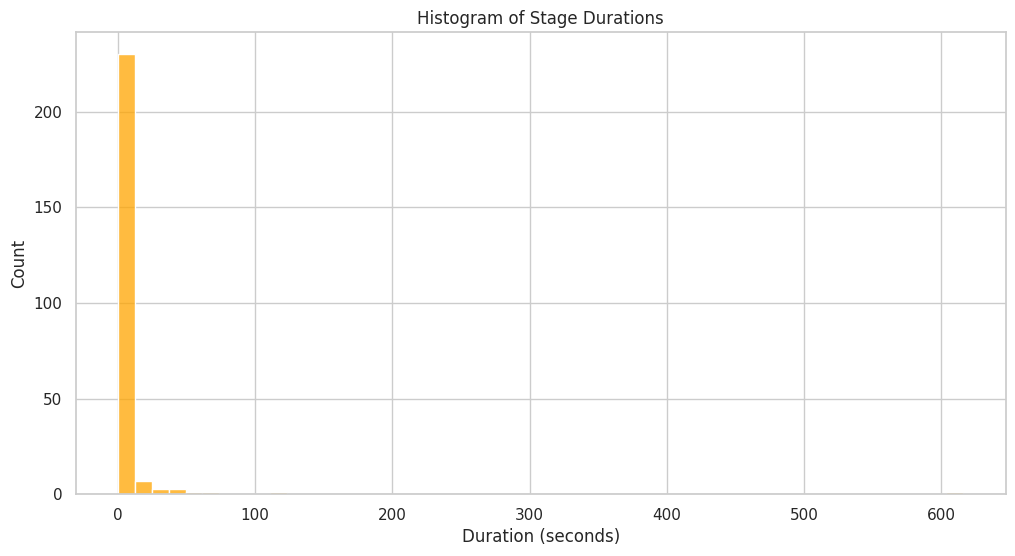

In [8]:
plot_bonus_spark_eventlog(pd.read_parquet("../../data/raw/first_experiment/df_jobs.parquet"), pd.read_parquet("../../data/raw/first_experiment/df_stages.parquet"))
